In [1]:
import parmed as pmd
import numpy as np
import os


import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import colorConverter
import seaborn as sns

%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic
%matplotlib inline

/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import plotting

In [5]:
lambd, attach, attach_sem = np.genfromtxt("/home/dslochower/kirkwood-niel/projects/partially-charged-ions/K-Cl_Simple/t300/data/int-a.100.dat",
                                         unpack=True)

In [19]:
dist, pull, pull_sem = np.genfromtxt("/home/dslochower/kirkwood-niel/projects/partially-charged-ions/K-Cl_Simple/t300/data/int-u.100.dat",
                                         unpack=True)

In [52]:
analytic = 0.078

ValueError: err must be [ scalar | N, Nx1 or 2xN array-like ]

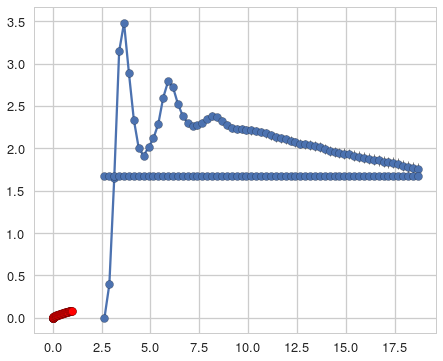

In [21]:
fig, ax = plt.subplots(1, figsize=(6 * 1.2, 6))

ax.errorbar(
    lambd,
    attach,
    yerr=attach_sem,
    fmt="o",
    ls="-",
    markersize=8,
    markeredgecolor="k",
    markeredgewidth=0.2,
    elinewidth=1.0,
    ecolor="0.5",
    color="r",
)

ax.errorbar(
    dist,
    pull,
    yerr=pull_sem,
    fmt="o",
    ls="-",
    markersize=8,
    markeredgecolor="k",
    markeredgewidth=0.2,
    elinewidth=1.0,
    ecolor="0.5",
)

# ax.errorbar(
#     dist,
#     pull[-1] - analytic,
#     yerr=pull_sem,
#     fmt="o",
#     ls="-",
#     markersize=8,
#     markeredgecolor="k",
#     markeredgewidth=0.2,
#     elinewidth=1.0,
#     ecolor="0.5",
# )

ax.set_xlabel(r"$\lambda$ or distance (\AA)")
ax.set_ylabel("Work (kcal/mol)")

In [61]:
def plot_pmf(attach, pull, release=None, release_to_std=None,
         attach_sem=None, pull_sem=None, release_SEM=None,
         attach_lambda=None, pull_initial=None, pull_final=None, release_lambda=None,
        title=None):

    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax1 = plt.subplot(gs[0, 0])
    
    attach = np.asarray(attach)
    pull = np.asarray(pull)
    if release:
        release = np.asarray(release)

    attach_range = np.arange(len(attach))
    pull_range = np.arange(attach_range[-1], attach_range[-1] + len(pull))
    
    if release:
        release_range = np.arange(pull_range[-1], pull_range[-1] + len(release))
        analytic_range = [release_range[-1], release_range[-1]]
    else:
        analytic_range = [pull_range[-1], pull_range[-1]]
        
    if release:
        final_fe = attach[-1] + pull[-1] + release[-1] + release_to_std
        final_sem = np.sqrt(attach_sem[-1]**2 + pull_sem[-1]**2 + release_SEM[-1]**2)
    else:
        final_fe = attach[-1] + pull[-1] + release_to_std

        final_sem = np.sqrt(attach_sem[-1]**2 + pull_sem[-1]**2)


    ax1.errorbar(attach_range, attach, yerr=attach_sem, marker="o",
                 ms=8, markeredgecolor='k', markeredgewidth=1, lw=3,
                label="Attach")
    ax1.errorbar(pull_range, attach[-1] + pull, yerr=pull_sem, marker="o", ms=8,
                 markeredgecolor='k', markeredgewidth=1, lw=3,
                label="Pull")

    if release:
        ax1.errorbar(release_range, attach[-1] + pull[-1] + -1 * release, yerr=release_SEM,
                     marker="o", ms=8, markeredgecolor='k', markeredgewidth=1, lw=3,
                    label="Release")
        ax1.errorbar(analytic_range, [attach[-1] + pull[-1] + -1 * release[-1], final_fe],
                     yerr=[release_SEM[-1], release_SEM[-1]],
                    label="Analytic")

        ax1.scatter(release_range[-1], final_fe, c='w', edgecolor='k', lw=2, s=80, zorder=10)
        ax1.annotate(r'${0:2.2f} \pm {1:2.2f}$'.format(final_fe, final_sem), 
                     xy=(release_range[-1] + 2, final_fe), xycoords='data')
        
        ax1.set_xticks([0, len(attach) - 1, 
                len(attach) - 1, len(attach) - 1 + len(pull) - 1,
                len(attach) - 1 + len(pull) - 1,  len(attach) - 1 + len(pull) - 1 + len(release) - 1])
        
        ax1.set_xticklabels([0, 1, pull_initial, pull_final, 0, 1])
        va = [ 0, 0, -0.05, -0.05, 0, 0]
        for t, y in zip( ax1.get_xticklabels( ), va ):
            t.set_y( y )

        
    else:
        ax1.errorbar(analytic_range, [attach[-1] + pull[-1], final_fe],
                     yerr=[pull_sem[-1], pull_sem[-1]],
                    label="Analytic")

        ax1.scatter(pull_range[-1], final_fe, c='w', edgecolor='k', lw=2, s=80, zorder=10)
        ax1.annotate(r'${0:2.2f} \pm {1:2.2f}$'.format(final_fe, final_sem), 
                     xy=(pull_range[-1] + 2, final_fe), xycoords='data')
        
        ax1.set_xticks([0, len(attach) - 1, 
                len(attach) - 1, len(attach) - 1 + len(pull) - 1,
                ])
        
        ax1.set_xticklabels([0, 1, pull_initial, pull_final])
        va = [ 0, 0, -0.05, -0.05]
        for t, y in zip( ax1.get_xticklabels( ), va ):
            t.set_y( y )

    
    ax1.legend()
    ax1.grid()
    ax1.set_xlabel(r'$\lambda$ or distance')
    ax1.set_ylabel('Work (kcal/mol)')

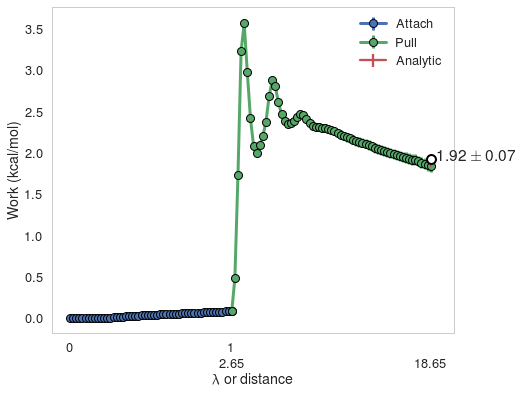

In [64]:
plot_pmf(attach, pull, release=None, release_to_std=analytic,
    attach_sem=attach_sem, pull_sem=pull_sem,
        pull_initial=2.65, pull_final=18.65)

In [71]:
pull[-1] + attach[-1]

1.8438657